In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Introduction
The Project Data is Supermarket Sales Analysis. The Supermarket Sales data can be downloaded from the link.
https://www.kaggle.com/aungpyaeap/supermarket-sales

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

 1.Invoice id: Computer generated sales slip invoice identification number,
 2.Branch: Branch of supercenter (3 branches are available identified by A, B and C),
 3.City: Location of supercenters,
 4.Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member        card,
 5.Gender: Gender type of customer,
 6.Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages,        Health and beauty, Home and lifestyle, Sports and travel,
 7.Unit price: Price of each product in $,
 8.Quantity: Number of products purchased by customer,
 9.Tax: 5% tax fee for customer buying,
 10.Total: Total price including tax,
 11.Date: Date of purchase (Record available from January 2019 to March 2019), 
 12.Time: Purchase time (10am to 9pm),
 13.Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet),
 14.COGS: Cost of goods sold,
 15.Gross margin percentage: Gross margin percentage,
 16.Gross income: Gross income,
 17.Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

# Importing libraries

In [2]:
# linear algebra
import numpy as np
# Data processing
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Getting the Data set

Importing the data set of Supermarket Sales. which can be downloaded from the link 
 https://www.kaggle.com/aungpyaeap/supermarket-sales

In [3]:
data=pd.read_csv("../input/supermarket-sales/supermarket_sales - Sheet1.csv")

# Data Exploration/ Analysis

Exploring the given data(viewing the data,checking info,Checking for null values,Feature Conversion,Correlation etc.)

In [4]:
data.head() # viewing data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
data.shape

(1000, 17)

The data set contains 1000 entries and 17 Features

In [6]:
data.info()     # checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.isnull().sum()     #Checking for Null Values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

We can observe that the data set dosen't contain any null values or NaN.

In [8]:
data.describe()     #Viewing Descriptive Statistics

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


We can see that the mean PerformanceRating of all the employees is 6.9727

## Variable transformations

In [9]:
df=data.copy() # assigning the data to another variable

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()

### Set the Date as the index of the dataset

In [11]:
df.set_index('Date', inplace=True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month
Date,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February


# Visualzation

## Univariate analysis

### Query1: What does the customer rating look like and is it skewed?

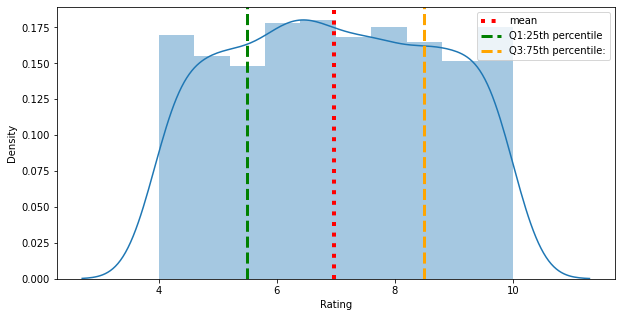

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df.Rating)
plt.axvline(x=df.Rating.mean(),label='mean',color='red', linestyle='dotted',lw=4)
plt.axvline(x=np.percentile(df['Rating'],25),label = 'Q1:25th percentile',color='green', linestyle='dashed',lw=3)
plt.axvline(x=np.percentile(df['Rating'],75),label = 'Q3:75th percentile:',color='orange', linestyle='dashed',lw=3 )
plt.legend()
plt.show()

##### The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th quartiles respectively.The mean rating is ~7 across products.

## Query2: Is there any difference in aggregate sales across branches?

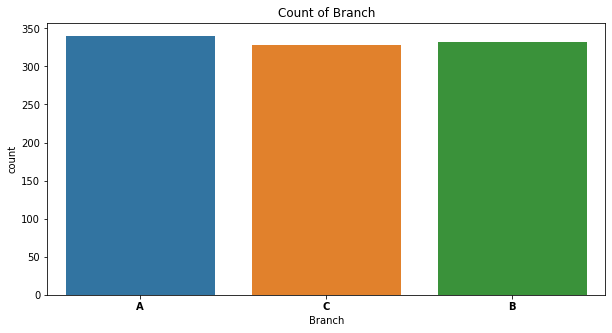

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(df.Branch).set_title("Count of Branch")
plt.xticks(fontsize=10,fontweight='bold')
plt.show()

In [15]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

##### There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A(i.e, Yangon city) is a bit higher than the rest of the branches.

## Query3: Which is the most pouplar payment method used by customers?

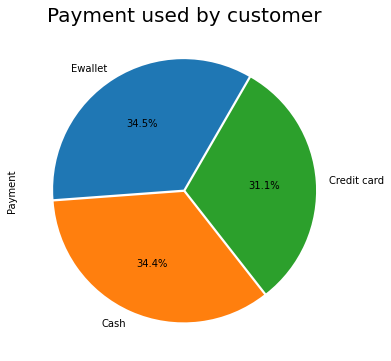

In [16]:
plt.figure(figsize=(6,6))
df['Payment'].value_counts().plot.pie(explode=[0.01,0.01,0.01],autopct='%1.1f%%',startangle=60)
plt.title('Payment used by customer',fontsize=20)
plt.show()

##### The most popular payment method is EWallet.

## Query4: Which product line has more sale ?

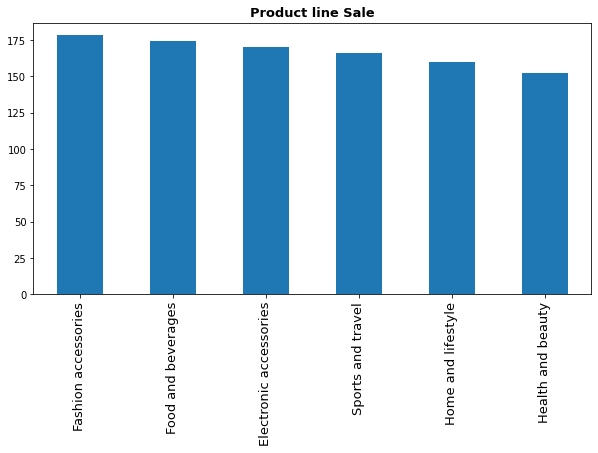

In [17]:
plt.figure(figsize=(10,5))
df['Product line'].value_counts().plot.bar().set_title("Product line Sale",fontsize=13,fontweight='bold')
plt.xticks(fontsize=13)
plt.show()

In [18]:
df.groupby('Product line')['Product line'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Product line, dtype: int64

##### Fashion accessories & Food and beverages sales are  bit higher than the rest of the product lines.

## Correlation analysis

### Individual correlations

In [19]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0],2)

-0.04

### Visualizing the pair wise correlations

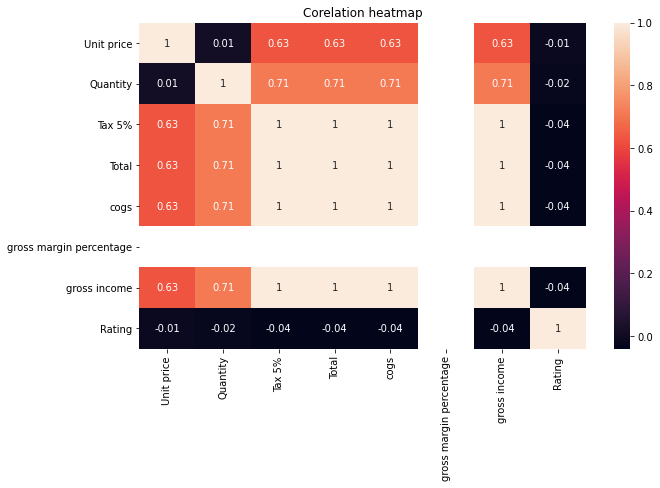

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.corr(),2), annot=True).set_title("Corelation heatmap")
plt.show()

##### As you can see, unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.As is obvious, Quantity and gross income has very high correlation of 70%.

## Bivariate analysis

## Query5: Rating distribution in 3 branches

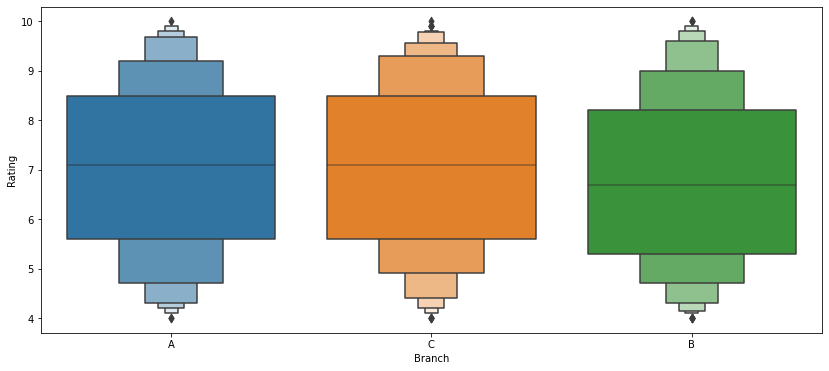

In [21]:
plt.figure(figsize=(14,6)) 
sns.boxenplot(x="Branch", y = "Rating" ,data =df)
plt.show()

In [22]:
df.groupby('Branch')['Rating'].mean()

Branch
A    7.027059
B    6.818072
C    7.072866
Name: Rating, dtype: float64

##### We can see that the average rating of branch A and C is more than seven and branch B is less than 7.

## Query6: Total bill in each product line ?

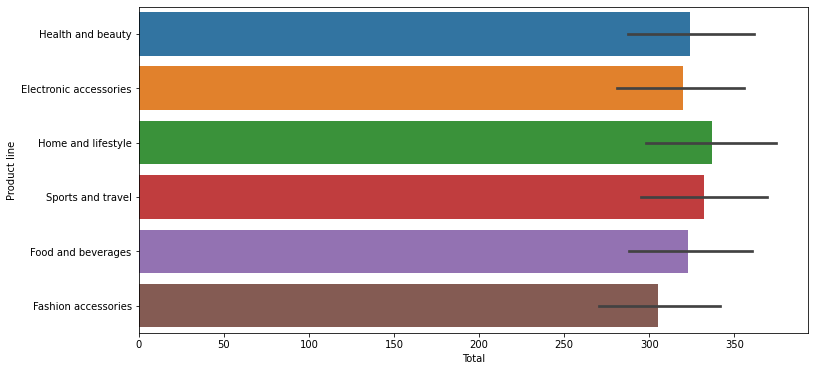

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total'],y=df['Product line'])
plt.show()

In [24]:
df.groupby('Product line')['Total'].mean().sort_values(ascending=False)

Product line
Home and lifestyle        336.636956
Sports and travel         332.065220
Health and beauty         323.643020
Food and beverages        322.671517
Electronic accessories    319.632538
Fashion accessories       305.089298
Name: Total, dtype: float64

##### Home and life style, Sports and travel are the highest average sales of product

## Query7: Product sales on the basis of gender

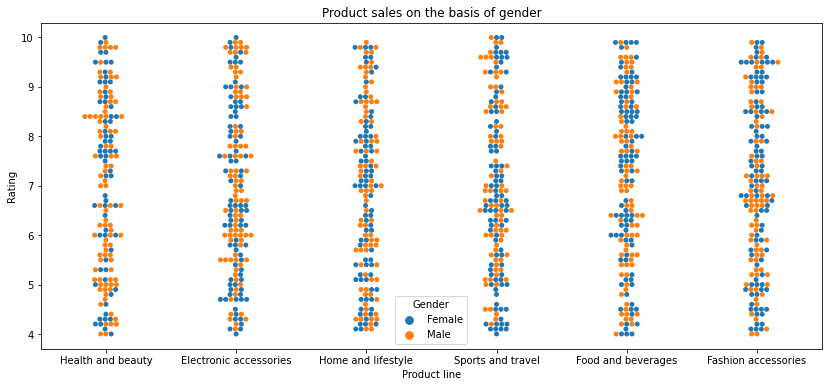

In [25]:
plt.figure(figsize=(14,6))
sns.swarmplot(x= "Product line", y = "Rating", hue = "Gender", data = df).set_title("Product sales on the basis of gender")
plt.show()

In [26]:
df.groupby('Product line')['Gender'].value_counts()

Product line            Gender
Electronic accessories  Male      86
                        Female    84
Fashion accessories     Female    96
                        Male      82
Food and beverages      Female    90
                        Male      84
Health and beauty       Male      88
                        Female    64
Home and lifestyle      Male      81
                        Female    79
Sports and travel       Female    88
                        Male      78
Name: Gender, dtype: int64

##### Fashion accessories, Food and beverages are the most bought products by Female customers. Electronic accessories, Health and beauty are the most bought products by Male customers.

## Qurey8: Does gross income affect the ratings that the customers provide?

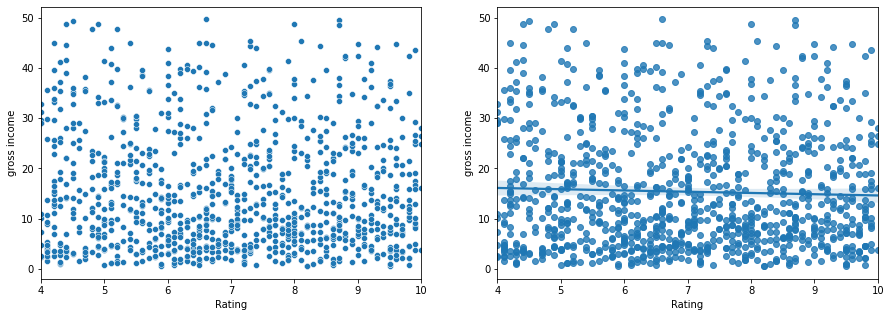

In [27]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(15,5))
sns.scatterplot(ax=axes[0], x=df['Rating'], y=df['gross income'])
sns.regplot(ax=axes[1], x=df['Rating'], y=df['gross income'])
plt.show()

##### As you can see from the scatter plot and the trend line which is pretty flat that there is no relationship between gross income of a customer and his rating.

## Query9: Which City is the most profitable?

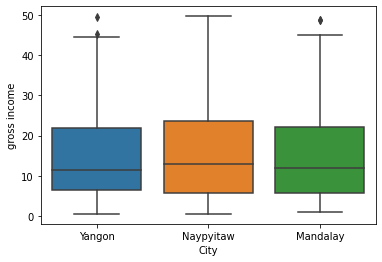

In [28]:
sns.boxplot(x=df['City'], y=df['gross income'])
plt.show()

In [29]:
df.groupby('City')['gross income'].mean()

City
Mandalay     15.232024
Naypyitaw    16.052367
Yangon       14.874001
Name: gross income, dtype: float64

##### There is not much difference in gross income by cities at an average level. Naypyitaw city has a slightly higher income than Yangon or Mandalay.

## Query10:  What is the relationship between Gender and Gross income?

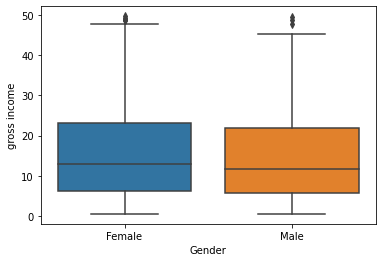

In [30]:
sns.boxplot(x=df['Gender'], y=df['gross income'])
plt.show()

In [31]:
df.groupby('Gender')['gross income'].mean()

Gender
Female    15.956936
Male      14.799487
Name: gross income, dtype: float64

##### Gross income is similar for both male and female, though female customers spend a bit higher.

## Query11: Which product line generates most income?

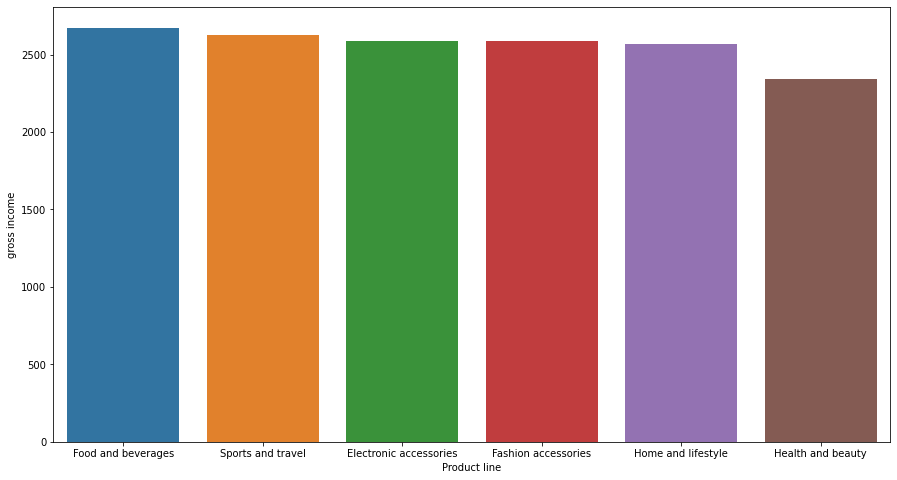

In [32]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum()
cat_sort=cat.sort_values(by='gross income', ascending=False)
plt.figure(figsize=(15,8))
sns.barplot(x='Product line', y='gross income', data=cat_sort)
plt.show()

In [33]:
df.groupby('Product line')['gross income'].sum()

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

##### Gross income is highest in Food and beverages.

## Query12: Is there any time trend in gross income?

In [34]:
df.groupby(df.index).mean().shape

(89, 8)

##### There are multiple dates per customers, so we have to summarize the data. We will use date as the index for this and for summarization we will use mean value of the variables. We get 89 rows i.e 89 unique days of data across all customers

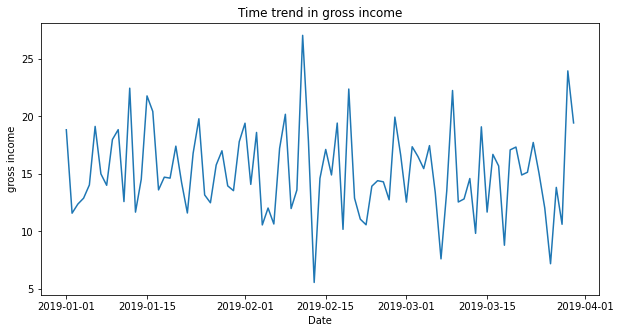

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(x= df.groupby(df.index).mean().index, y = df.groupby(df.index).mean()['gross income'])
plt.title("Time trend in gross income")
plt.show()

##### No particular time trend except for some days the gross income is pretty high and some days it is pretty low. Overall it remains at a certain average level.

## Other analysis`

### Query13: What is the spending patterns of females and males and in which category do they spend a lot?

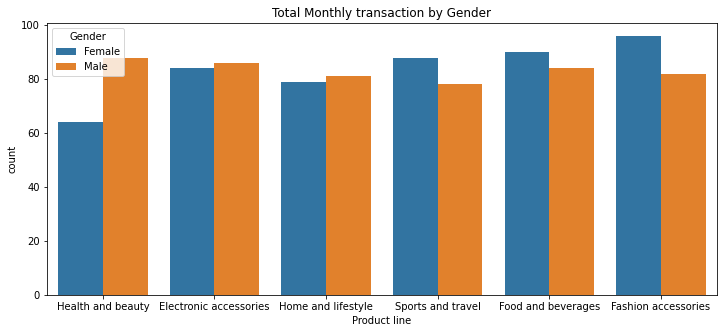

In [36]:
plt.figure(figsize=(12, 5))
plt.title('Total Monthly transaction by Gender')
sns.countplot(x='Product line', hue = 'Gender', data=df)
plt.show()

##### For the analysis on spending patterns of males and females, we can create create a dummy variable for Gender and concatenate it with the original data.

### Dummy method

In [37]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
Date,,
2019-01-05,1,0
2019-03-08,1,0
2019-03-03,0,1
2019-01-27,0,1
2019-02-08,0,1


##### Join the Gender dummies with the original data

In [39]:
df1 = pd.concat([df, gender_dummies], axis = 1)
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month,Female,Male
Date,,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,1,0
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,1,0
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,0,1
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,0,1
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,0,1


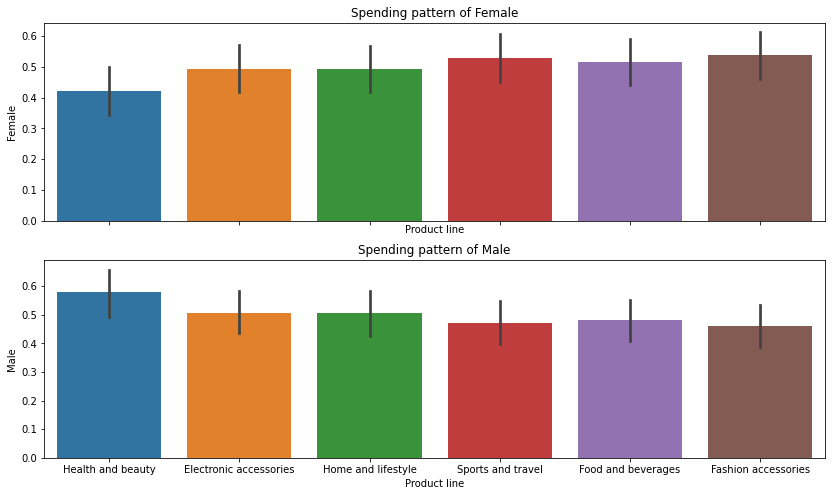

In [40]:
fig, axes = plt.subplots(2,1, sharex=True, figsize=(14,8))
sns.barplot(ax=axes[0], x=df1['Product line'], y=df1['Female']).set_title("Spending pattern of Female")
sns.barplot(ax=axes[1], x=df1['Product line'], y=df1['Male']).set_title("Spending pattern of Male")
plt.show()

## Query14: How many products are bought by customers?

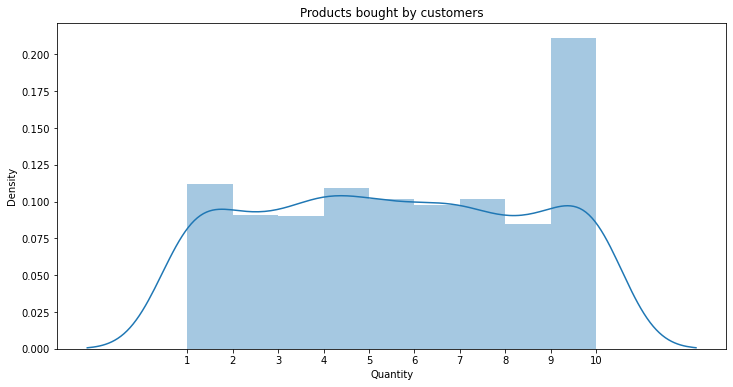

In [41]:
plt.figure(figsize = (12,6))
x_ticks = [1,2,3,4,5,6,7,8,9,10]
sns.distplot(df.Quantity).set_title('Products bought by customers')
plt.xticks(x_ticks)
plt.show()

In [42]:
df[['Quantity']]['Quantity'].value_counts()

10    119
1     112
4     109
5     102
7     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64

##### Most of the customers buy 10 quantities

## Query15: Which day of the week has maximum sales?

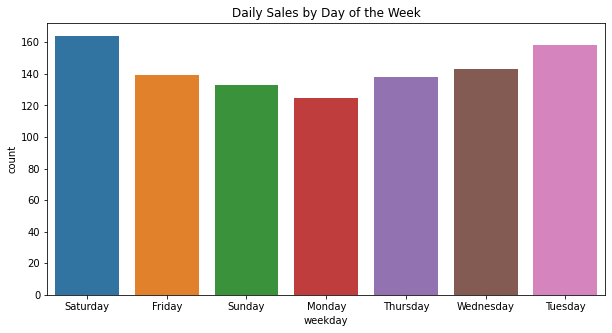

In [43]:
plt.figure(figsize=(10, 5))
sns.countplot(df.weekday).set_title('Daily Sales by Day of the Week')
plt.show()

##### Sales are highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

## Query16: Which hour of the day is the busiest?

In [44]:
# We need to extract the hour from the ‘Date’ variable to do this analysis.
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

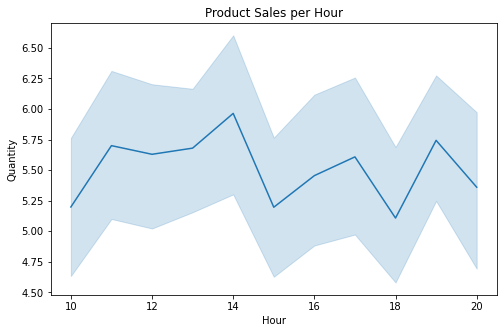

In [45]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df.Hour,  y = df.Quantity).set_title("Product Sales per Hour")
plt.show()

##### Peak is observed at 2 pm of the day. Hence, sales is typically higher in the afternoons.

## Query17: Which product line should the supermarket focus on?

### i) Rating of products

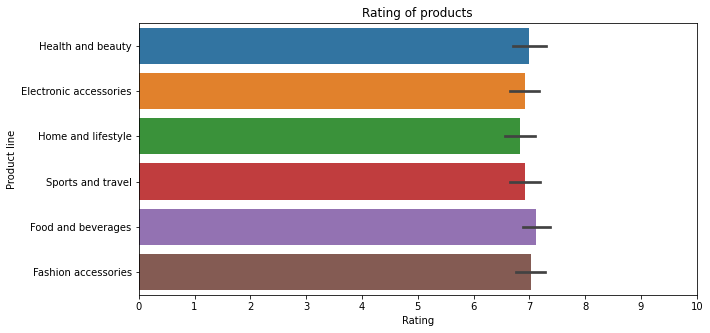

In [46]:
plt.figure(figsize = (10,5))
x_ticks = [0,1,2,3,4,5,6,7,8,9,10]
sns.barplot(y = df['Product line'], x = df.Rating).set_title("Rating of products")
plt.xticks(x_ticks)
plt.show()

##### Rating is similar across products and at around 7.

### ii) Quantity purchased by product

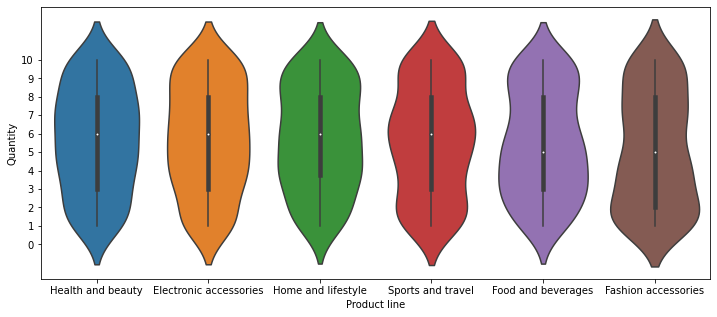

In [47]:
plt.figure(figsize = (12,5))
y_ticks = [0,1,2,3,4,5,6,7,8,9,10]
sns.violinplot(x = 'Product line', y = 'Quantity', data=df )
plt.yticks(ticks=y_ticks)
plt.show()

##### Though the rating for 'fashion accessories' and 'food and beverages' is high but quantity purchased is low. Hence, supply for these products need to be increased.

### Query18: Which city should be chosen for expansion and which products should it focus on?

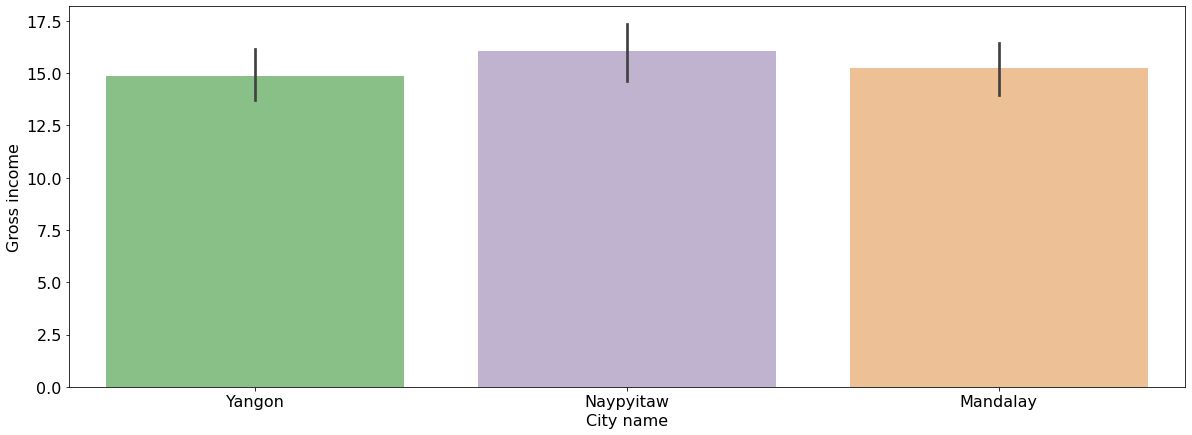

In [48]:
plt.figure(figsize=(20,7))
sns.barplot(df['City'],df['gross income'],palette='Accent')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')
plt.show()

##### It is obvious that Naypyitaw is the most profitable city, hence the expansion plan should be based on this city.

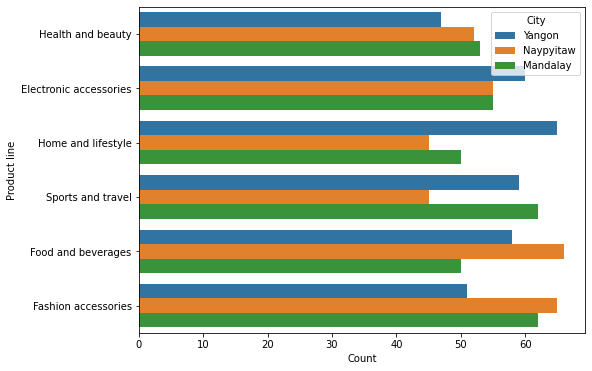

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

##### Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.

## Query19: Customer type basis on Gender

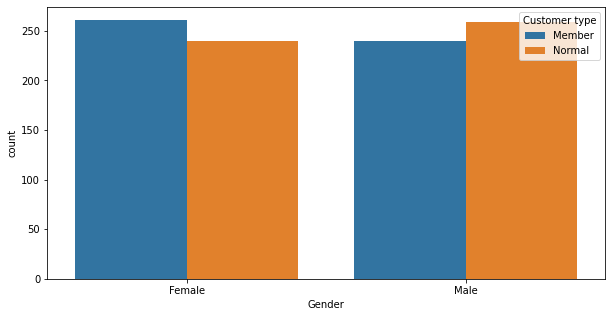

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['Customer type'],x=df['Gender'])
plt.show()

In [51]:
#what is the distribution of customer type for each Gender
pd.pivot_table(df , index = 'Customer type' , values = 'Invoice ID' , columns = 'Gender' , aggfunc = 'count')

Gender,Female,Male
Customer type,,
Member,261,240
Normal,240,259


##### Most of the Females have membership card.

## Query20: Customer type basis on Product line

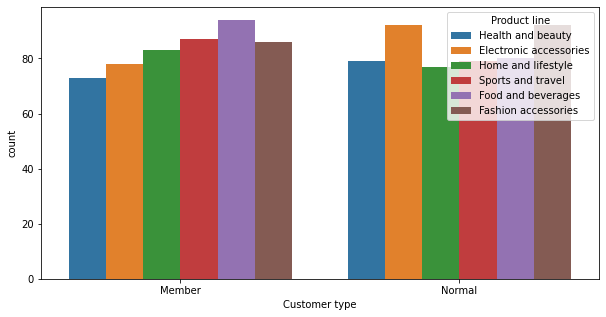

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Customer type'],hue=df['Product line'])
plt.show()

In [53]:
pd.pivot_table(df , index = 'Customer type' , values = 'Invoice ID' , columns = 'Product line' , aggfunc = 'count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Customer type,,,,,,
Member,78,86,94,73,83,87
Normal,92,92,80,79,77,79


##### Customers with membership card are buying more products from Food and beverages and Non-membership customers are buying more products from Electronic accessories

## Query21: Customer type basis on Branch

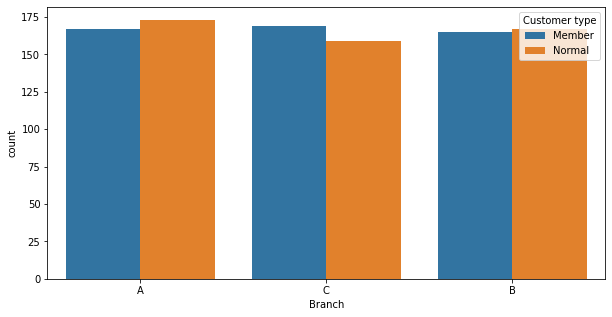

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(hue=df['Customer type'],x=df['Branch'])
plt.show()

In [56]:
#what is the distribution of customer type for each branch
pd.pivot_table(df , index = 'Customer type' , values = 'Invoice ID' , columns = 'Branch' , aggfunc = 'count')

Branch,A,B,C
Customer type,,,
Member,167,165,169
Normal,173,167,159


##### There are more Membership type customers from Branch C.

## Query22: Which  Month has maximum sales?

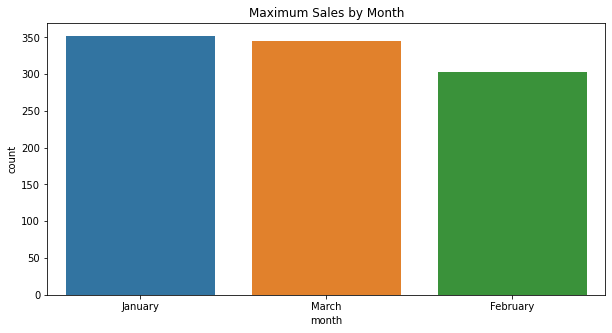

In [57]:
plt.figure(figsize=(10, 5))
sns.countplot(df.month).set_title('Maximum Sales by Month')
plt.show()

In [58]:
df.groupby('month')['gross income'].count().sort_values(ascending=False)

month
January     352
March       345
February    303
Name: gross income, dtype: int64

##### Sales are highest in the month of January.

## Query23: Which branch has more product line sale

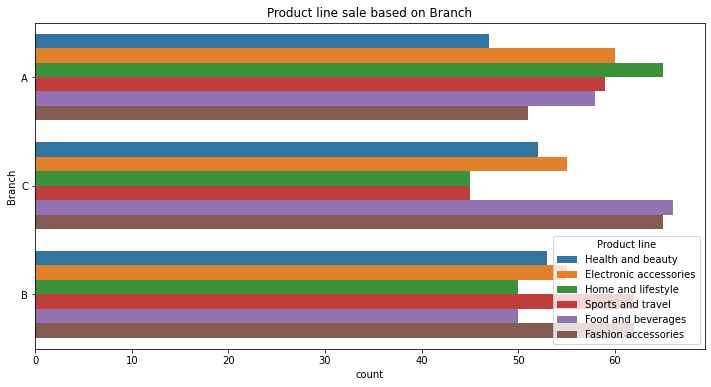

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Branch'],hue=df['Product line']).set_title("Product line sale based on Branch")
plt.show()

In [60]:
df.groupby('Branch')['Product line'].count()

Branch
A    340
B    332
C    328
Name: Product line, dtype: int64

In [61]:
pd.pivot_table(df , index = 'Branch' , values = 'Invoice ID' , columns = 'Product line' , aggfunc = 'count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Branch,,,,,,
A,60,51,58,47,65,59
B,55,62,50,53,50,62
C,55,65,66,52,45,45


##### Branch A has more product line sales compared to other two branches. Branch A has more sales from Home and lifestyle product line. Branch c has more sales from Food and beverages,Fashion accessories. Branch B has more sales from Sports and travel, Fashion accessories.

## Query24: Which Product line has highest cogs

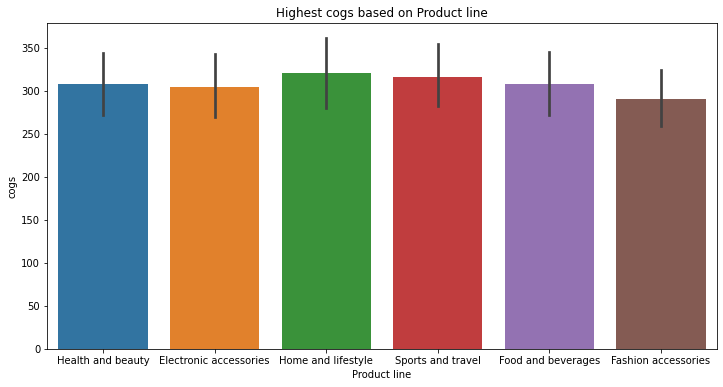

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Product line'],y=df['cogs']).set_title("Highest cogs based on Product line")
plt.show()

In [63]:
df.groupby('Product line')['cogs'].mean()

Product line
Electronic accessories    304.411941
Fashion accessories       290.561236
Food and beverages        307.306207
Health and beauty         308.231447
Home and lifestyle        320.606625
Sports and travel         316.252590
Name: cogs, dtype: float64

##### Home and lifestyle, Sports and travel has highest cogs.

## Query25: Which Branch has highest gross icome

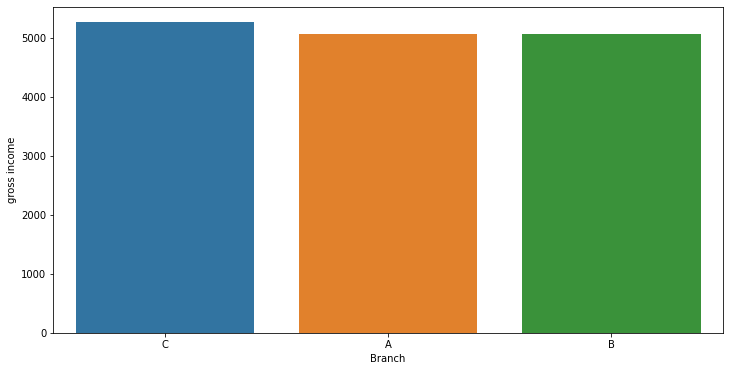

In [66]:
branch=df[["Branch", "gross income"]].groupby(['Branch'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Branch', y='gross income',data=branch)
plt.show()

##### Branch C has highest gross income.

In [67]:
pd.pivot_table(df , columns = 'Branch' , aggfunc='sum' , values = 'gross income')

Branch,A,B,C
gross income,5057.1605,5057.032,5265.1765


## Query 26: Finding the relation between Unit price and gross income

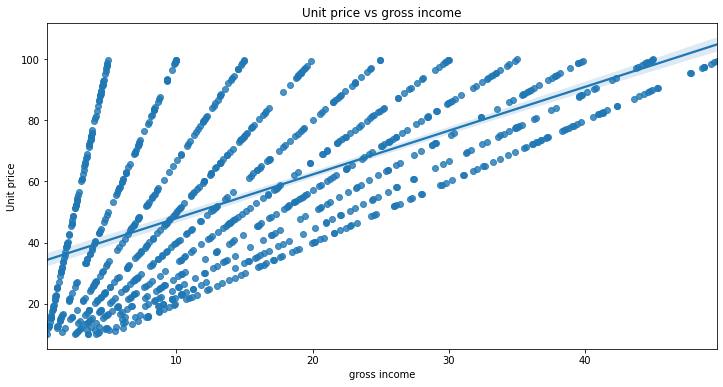

In [68]:
plt.figure(figsize=(12,6))
sns.regplot(data = df, x = 'gross income', y = 'Unit price').set_title("Unit price vs gross income")
plt.show()

##### People with higher gross incomes seem to be able to afford items of higher unit price.

# Applying algorithm and Buliding the model

 #### Importing libraries required for building the model

In [69]:
# data type conversion
from sklearn.preprocessing import LabelEncoder
# re processing the data
from sklearn.preprocessing import StandardScaler
# Splitting the data
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.cluster import KMeans

### Copying data 

In [70]:
df1=df.copy() # copying the data ans assigning it to other variable

In [71]:
df1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month,Hour
Date,,,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2021-04-19 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,13
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2021-04-19 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,March,10
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2021-04-19 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,13
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2021-04-19 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,20
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2021-04-19 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,10


In [72]:
df1.drop(columns=['Invoice ID','Time'],inplace=True) # dropping the columns

In [73]:
objList = df1.select_dtypes(include = "object").columns       # extracting object data type from dataset
print (objList)                                  

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'weekday', 'month'],
      dtype='object')


In [74]:
### Converting features`m

In [75]:
le = LabelEncoder()
for features in objList:
    df1[features] = le.fit_transform(df1[features])
df1.info()       #Checking Info after LabelEncoding

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2019-01-05 to 2019-02-18
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   int64  
 1   City                     1000 non-null   int64  
 2   Customer type            1000 non-null   int64  
 3   Gender                   1000 non-null   int64  
 4   Product line             1000 non-null   int64  
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   int64  
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
 14  weekda

In [76]:
df1.head()         #Viewing Data after LabelEncoding

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month,Hour
Date,,,,,,,,,,,,,,,,,
2019-01-05,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1,2,1,13
2019-03-08,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6,0,2,10
2019-03-03,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4,3,2,13
2019-01-27,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4,3,1,20
2019-02-08,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3,0,0,10


##### Standardization is a another reprocessing tool which transforms all the numerical values (assuming that the whole dataset is just numerical values) into values between -1 and 1. This increases the processing speed and makes using algorithms on the data easier.

In [77]:
scale = StandardScaler()
scaleddata = pd.DataFrame(scale.fit_transform(df1), columns=df1.columns)

## Feature Selection

### Corelation heatmap

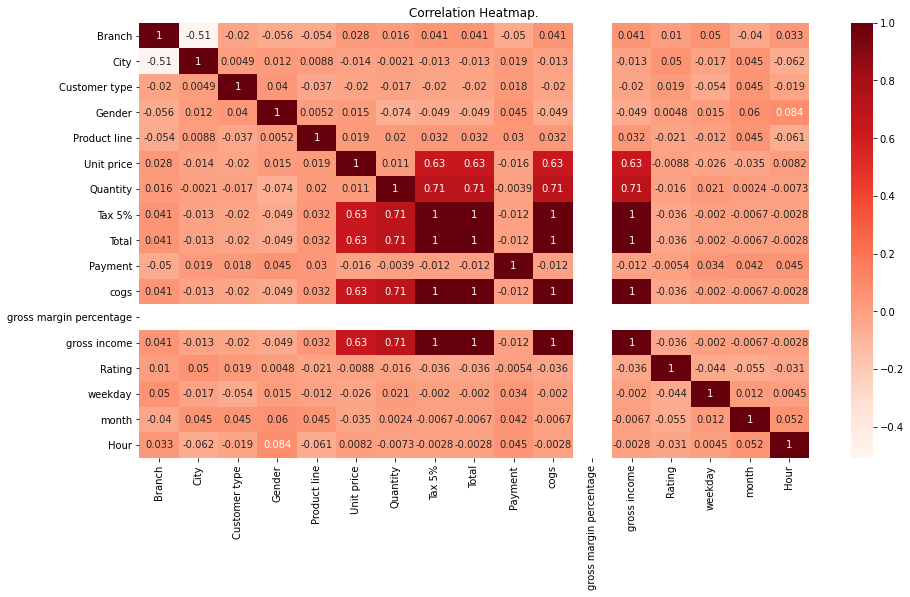

In [78]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap=plt.cm.Reds).set_title('Correlation Heatmap.')
plt.show()

##### There is a high positive correlation between the gross income and total as well as gross income and quantity 

* There are no corelated variables with Rating. if we choose Rating as a target variable it effects our model performance. 
* So we can't use Supervised Machine Learning Algorithms here. And clearly we get know that this dataset is used for analysis.
* In order to apply ML model we have to go with Un-Supervised ML. So we are using KMeans Clustering algorithm.

### Model buliding

In [80]:
# Evaluating the model performance
model = KMeans(n_clusters=4, init="k-means++",random_state=0)
model.fit(df1)

KMeans(n_clusters=4, random_state=0)

In [81]:
clusters = model.fit_predict(df1)
clusters

array([2, 0, 3, 2, 2, 2, 2, 1, 0, 0, 0, 0, 3, 2, 1, 2, 2, 2, 0, 0, 2, 3,
       0, 0, 3, 2, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 3, 2, 2, 3, 0, 0, 2, 1,
       0, 2, 2, 0, 0, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 0, 3, 2, 0, 3, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 3, 0, 3, 3, 2, 2, 3,
       0, 2, 3, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 3, 3, 3, 1, 0, 2, 3, 1,
       0, 3, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2, 1, 3, 2,
       0, 2, 2, 3, 0, 3, 2, 2, 1, 1, 1, 0, 2, 3, 3, 3, 2, 3, 3, 3, 1, 0,
       1, 2, 0, 3, 1, 2, 3, 0, 3, 0, 2, 3, 1, 1, 3, 2, 3, 2, 0, 3, 0, 3,
       0, 0, 2, 3, 2, 3, 0, 3, 0, 0, 1, 3, 0, 3, 3, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 1, 3, 1, 2, 0, 3, 0, 0, 3, 1, 0,
       3, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 3, 2, 3, 0, 3, 0, 0, 3, 0,
       3, 3, 1, 2, 3, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 3,
       0, 1, 0, 1, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 1, 2, 2, 0, 0, 2, 3, 3,
       0, 3, 3, 1, 2, 3, 0, 0, 0, 3, 0, 2, 3, 0, 3,

## Visulazing the model

### Plot for the gross income and unit price of the items bought

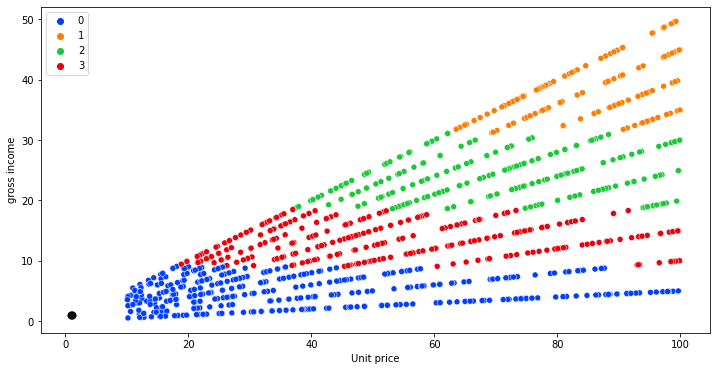

In [82]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df1, x="Unit price", y="gross income", hue= clusters, palette = "bright")
centers = model.cluster_centers_
# Plot centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha = 0.6)
plt.xlabel("Unit price")
plt.ylabel("gross income")
plt.show()

### Clustering the data

In [83]:
clusters = pd.DataFrame(model.fit_predict(df1), columns=['clusters'])
richcustomers = data.loc[clusters['clusters'] == 1]
notrichcustomers = data.loc[clusters['clusters'] == 0]

## Plotting the countplot for the customers from each of the cities

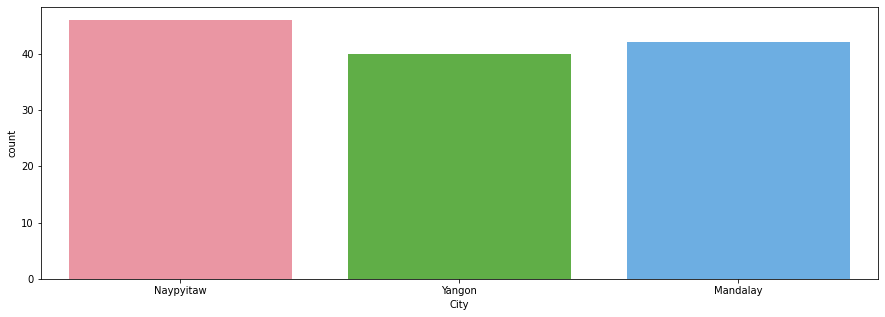

In [84]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.countplot(richcustomers['City'])
plt.show()

##### Naypyitaw city has more rich customers.

## Checking what exactly do the wealthy customers and thrifters buy

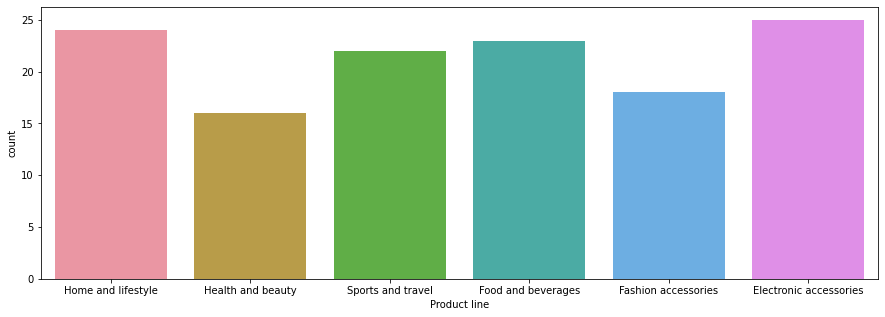

In [85]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.countplot(richcustomers['Product line'])
plt.show()

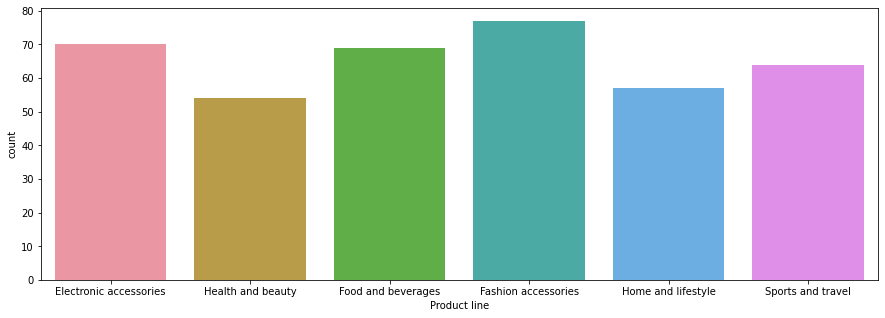

In [86]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.countplot(notrichcustomers['Product line'])
plt.show()

## Comparing the total value of items bought by the wealthy and the thrifters

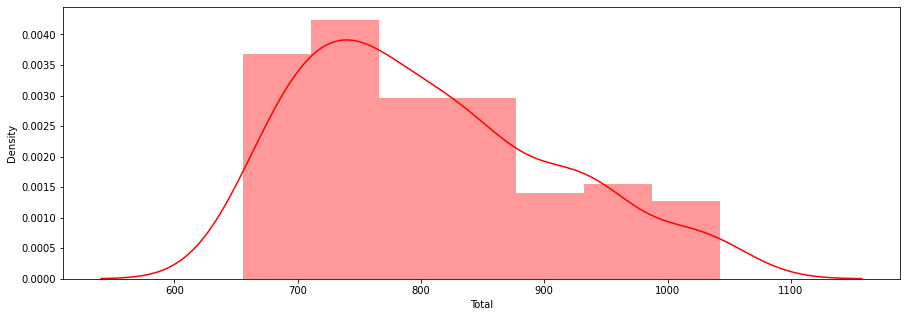

In [87]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.distplot(richcustomers['Total'])
plt.show()

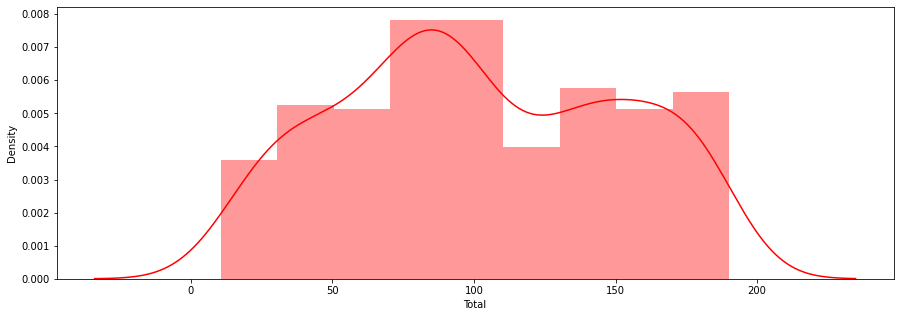

In [88]:
plt.figure(figsize=(15,5))
sns.set_palette(['red'])
sns.distplot(notrichcustomers['Total'])
plt.show()

##### Clearly the clustering algorithm (KMeans) is working fine. The wealthy customers pay way more than the thrifters and this can be clearly seen in the distributions.

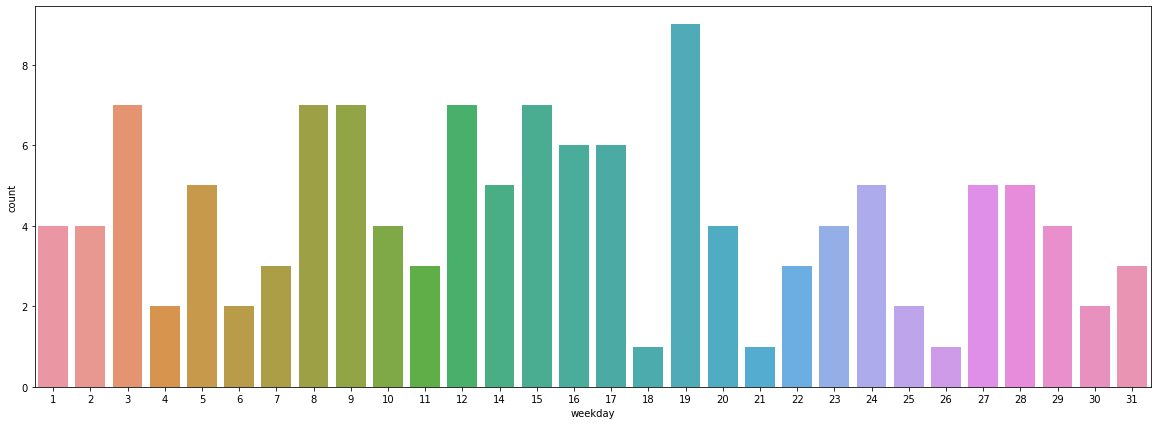

In [89]:
richcustomers['Date'] = pd.to_datetime(richcustomers['Date'])
richcustomers['weekday'] = richcustomers['Date'].dt.day
plt.figure(figsize=(20,7))
sns.countplot(richcustomers['weekday'])
plt.show()

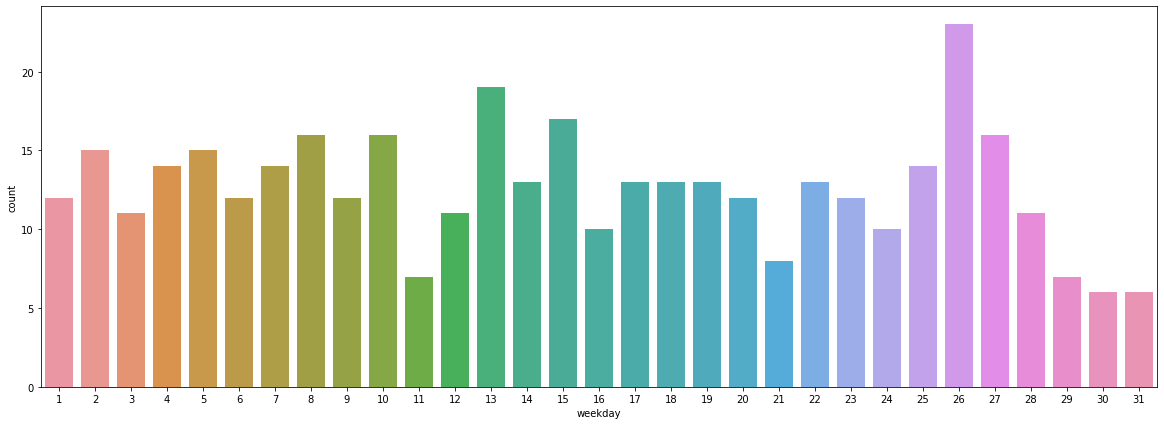

In [90]:
notrichcustomers['Date'] = pd.to_datetime(notrichcustomers['Date'])
notrichcustomers['weekday'] = notrichcustomers['Date'].dt.day
plt.figure(figsize=(20,7))
sns.countplot(notrichcustomers['weekday'])
plt.show()

Clearly, what is clearly visible here is that the supermarket gets more visitors during particular days of the month.In the case of the wealthy customers the peak day of all three months is the 19th day of the respective month.In the case of the thrift shoppers, the peak day of each month is the 26th day of the month.

# Conclusion:

We used uni-variate, bi-variate and correlation analysis to perform basic EDA on the supermarket sales data.

To summarize below are some of the findings/observations from the data:

* The customer rating is more or less uniform with the mean rating being around 7 and there is no relationship between gross income and customer ratings.

* The data consists of 3 cities/branches. Though branch A has slightly higher sales than the rest, C i.e. Naypyitaw is the most profitable branch in terms of gross income.

* Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on along with electronic accessories.

* The most popular payment method is E-wallet and cash payment is also on the higher side.

* There is no particular time trend that can be observed in gross income.

* At an overall level, ‘Sports and Travel’ generates highest gross income.

* Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile. Females spend on ‘fashion accessories’ the most and for males surprisingly it is ‘Health and beauty’. Females also spend more on ‘Sports and travel’ which generates highest income overall.

* Using the correlation analysis, one interesting observation has emerged that customer ratings is not related to any variable.

* Most of the customers buy 10 quantities and busiest time of the day is afternoon i.e. around 2 pm which records highest sales. Sales is higher on Tuesdays and Saturdays compared to the rest of the week.

* Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but the quantity purchased is low. Hence, supply for these products need to be increased.